In [1]:
TEST = False
N = 500
relation_to_test = 0 # 0 - triple, 1 - instanceOf, 2 - subClassOf

In [2]:
train_path = [
    'D:/uni/master/data/YAGO39K/Train/triple2id.tsv',
    'D:/uni/master/data/YAGO39K/Train/long.tsv',
    'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv',
    'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv'
]

val_path =  [
    'D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv'
]

neg_val_path = [
    'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv',
    'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv',
    'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_negative.tsv'
]

test_path =  [
    'D:/uni/master/data/YAGO39K/Test/triple2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Test/instanceOf2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Test/subClassOf2id_positive.tsv'
]

neg_test_path = [
    'D:/uni/master/data/YAGO39K/Test/triple2id_negative.tsv',
    'D:/uni/master/data/YAGO39K/Test/instanceOf2id_negative.tsv',
    'D:/uni/master/data/YAGO39K/Test/subClassOf2id_negative.tsv'
]



if TEST:   
    train_path = [
        'D:/uni/master/data/debug/triple2id.tsv'
    ]
    #test_path =  [
    #    'D:/uni/master/data/debug/triple2id_positive_test.tsv']
    #val_path =  [
    #    'D:/uni/master/data/debug/triple2id_positive_test.tsv']


Check which hyper-parameters are required by Region:

In [3]:
from pykeen.kge_models import Region
Region.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'normalization_of_entities',
 'init_radius',
 'reg_lambda',
 'loss_type',
 'single_pass',
 'neg_factor',
 'region_type']

Train and evaluate Region (provide test set):
* Define the path to our test set: **test_set_path**
* Define the path to our the negative test set: **neg_test_path** in case of triple classfication evaluation
* Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 50, 'normalization_of_entities': 2, 'init_radius': 10, 'reg_lambda': 0.1, 'margin_loss': 0, 'learning_rate': 2, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'region_type': 'ellipse', 'embedding_dim': 70, 'normalization_of_entities': 1, 'init_radius': 10, 'reg_lambda': 10, 'loss_type': 'MRL', 'margin_loss': 0.0, 'single_pass': True, 'neg_factor': 2, 'learning_rate': 5, 'num_epochs': 50, 'batch_size': 1024, 'test_batch_size': 4096, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 100, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}

In [4]:
config = dict(
    metrics                     = ['prediction'],
    training_set_path           = train_path,
    test_set_path               = val_path,
    neg_test_set_path           = neg_val_path,
    mapping_path                = 'D:/uni/master/data/YAGO39K/',
    execution_mode              = 'Training_mode',
    random_seed                 = 2,
    kg_embedding_model_name     = 'Region',
    region_type                 = 'ellipse', # 'ellipse', 'sphere'
    embedding_dim               = 100,
    normalization_of_entities   = 2,
    init_radius                 = 0,
    reg_lambda                  = 1e-1,
    loss_type                   = 'NLL',
    margin_loss                 = 0.5,  # für log WS
    single_pass                 = True,
    neg_factor                  = 1,
    learning_rate               = 0.001,
    num_epochs                  = N,  
    batch_size                  = 1024,
    test_batch_size             = 4096,
    filter_negative_triples     = True,
    preferred_device            = 'gpu'
)

In [5]:
output_directory = 'D:/uni/master/models/region_dim{}_{}_rad{}_regL{}_lr{}_loss-{}_margin{}_singlepass-{}_negfactor{}_epochs{}/'.format(
    config['embedding_dim'], config['region_type'], config['init_radius'], 
    str(config['reg_lambda']).replace('.',''), 
    str(config['learning_rate']).replace('.',''),
    config['loss_type'],
    config['margin_loss'],
    config['single_pass'],
    config['neg_factor'],
    config['num_epochs']
)
output_directory

'D:/uni/master/models/region_dim100_ellipse_rad0_regL01_lr0001_loss-NLL_margin0.5_singlepass-True_negfactor1_epochs500/'

In [6]:
if TEST:
    output_directory = 'D:/uni/master/models/test/'

In [7]:
import logging
import os
import sys
import time
import pykeen

In [8]:
logging.basicConfig(level=logging.DEBUG)
logging.getLogger('pykeen').setLevel(logging.DEBUG)

In [9]:
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


In [10]:
print(time.asctime())

Sun May 12 17:49:56 2019


In [11]:
print(pykeen.get_version())

0.0.26-dev


## Train and evaluate Region:

In [12]:
import numpy as np
import matplotlib.pyplot as plt

DEBUG:matplotlib:$HOME=C:\Users\aquam
DEBUG:matplotlib:CONFIGDIR=C:\Users\aquam\.matplotlib
DEBUG:matplotlib:matplotlib data path: D:\uni\master\conda_env\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file D:\uni\master\conda_env\lib\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 3.0.3
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', 'encodings.cp1251', 'site', 'os', 'errno', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_bootlocale', '_locale', 'types', 'functools', '_functools', 'collections', 'operator', '_operato

DEBUG:matplotlib:CACHEDIR=C:\Users\aquam\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\aquam\.matplotlib\fontlist-v300.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [13]:
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [14]:
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

DEBUG:pykeen.utilities.pipeline:Reading the label mappings...


{'metrics': ['prediction'], 'training_set_path': ['D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'D:/uni/master/data/YAGO39K/Train/long.tsv', 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv'], 'test_set_path': ['D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv', 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv'], 'neg_test_set_path': ['D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv', 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_negative.tsv'], 'mapping_path': 'D:/uni/master/data/YAGO39K/', 'execution_mode': 'Training_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'region_type': 'ellipse', 'embedding_dim': 100, 'normalization_of_entities': 2, 'init_radius': 0, 'reg_lambda': 0.1, 'loss_type': 'NLL', 'margin_loss': 0.5, 'single_pass': True, 'neg_factor': 1, 'l

INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
DEBUG:pykeen.utilities.train_utils:****running model on cuda:0****
INFO:pykeen.utilities.train_utils:Epoch  0 / 500 (116.1 s):   loss: 1.279   val loss: 2.152
DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  1 / 500 (115.8 s):   loss: 3.077   val loss: 4.046
INFO:pykeen.utilities.train_utils:Epoch  2 / 500 (116.4 s):   loss: 4.904   val loss: 5.787
INFO:pykeen.utilities.train_utils:Epoch  3 / 500 (116.6 s):   loss: 6.572   val loss: 7.383
INFO:pykeen.utilities.train_utils:Epoch  4 / 500 (116.5 s):   loss: 8.125   val loss: 8.905
INFO:pykeen.utilities.train_utils:Epoch  5 / 500 (116.6 s):   loss: 9.643   val loss: 10.431
INFO:pykeen.utilities.train_utils:Epoch  6 / 500 (116.6 s):   loss: 11.186   val loss: 11.993
INFO:pykeen.utilities.train_utils:Epoch  7 / 500 (116.6 s):   loss: 12.771   val loss: 13.609
INFO:pykeen.utilities.train_utils:Epoch  8 /

Check result entries:

In [15]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'validation_losses', 'entity_to_embedding', 'relation_to_embedding', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration', 'search_summary'])

Visualize loss values:

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('D:\\uni\\master\\conda_env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('D:\\uni\\master\\conda_env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


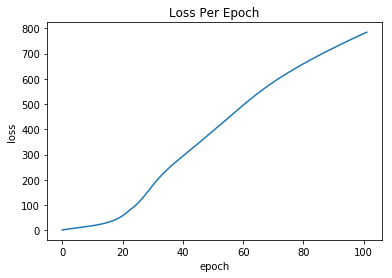

In [16]:
losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


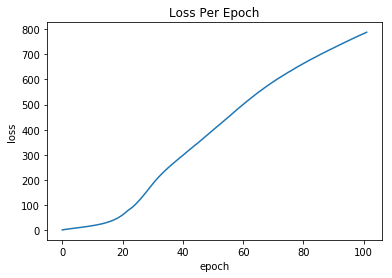

In [17]:
losses = results.results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [18]:
results.results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': 0.5630004214075011,
 'recall': 0.3483475653477609,
 'accuracy': 0.5386045601330854,
 'f1_score': 0.430395038859582}

## Load and evaluate

In [19]:
import torch
import json
import os
import pykeen.constants as pkc
from pykeen.kge_models import get_kge_model
from pykeen.utilities.pipeline import Pipeline

In [20]:
#input_directory = 'D:/uni/master/models/region_hpo/'
#input_directory = 'D:/uni/master/models/region_dim50_rad10_regL01_lr2/'
input_directory = output_directory
input_directory

'D:/uni/master/models/region_dim100_ellipse_rad0_regL01_lr0001_loss-NLL_margin0.5_singlepass-True_negfactor1_epochs500/'

In [21]:
model_dir = 'D:/uni/master/models/'
models = os.listdir(model_dir)
models

['region_1000epochs',
 'region_20epochs',
 'region_300epochs',
 'region_5epochs',
 'region_dim100_ellipse_rad0_regL01_lr0001_loss-NLL_margin0.5_singlepass-True_negfactor1_epochs500',
 'region_dim100_ellipse_rad0_regL1e-05_lr0001_loss-NLL_margin0.5_singlepass-True_negfactor1_epochs500',
 'region_dim100_ellipse_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs50',
 'region_dim100_sphere_rad10_regL1e-05_lr0001_loss-MRL_margin0.0_singlepass-False_negfactor1_epochs1',
 'region_dim100_sphere_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs1',
 'region_dim100_sphere_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs3',
 'region_dim100_sphere_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs50',
 'region_dim10_sphere_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs5',
 'region_dim20_rad5_regL002_lr5',
 'region_dim20_rad5_regL002_lr5_loss-MRL_margin0_singlepass-Fals

In [42]:
model_path = 'region_dim100_ellipse_rad0_regL1e-05_lr0001_loss-NLL_margin0.5_singlepass-True_negfactor1_epochs500'
if model_path:
    input_directory = os.path.join(model_dir, model_path)
    results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
    }
    # Initialize KG embedding model
    config = results['final_configuration']
    config['training_set_path'] = train_path
    config['test_set_path'] = val_path
    config['neg_test_set_path'] = neg_val_path
    relation_to_id = results['relation_to_id']
    entity_to_id = results['entity_to_id']
else:
    # Initialize KG embedding model
    config[pkc.NUM_ENTITIES] = 85482
    config[pkc.NUM_RELATIONS] = 39
    config[pkc.PREFERRED_DEVICE] = 'gpu'
    relation_to_id = json.load(open(os.path.join(input_directory, 'relation_to_id.json'),'r'))
    entity_to_id = json.load(open(os.path.join(input_directory, 'entity_to_id.json'),'r'))

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [43]:
pipeline = Pipeline(config)
if config['random_seed'] is not None:
    torch.manual_seed(config['random_seed'])
pipeline.entity_label_to_id = entity_to_id
pipeline.relation_label_to_id = relation_to_id
    
model: torch.nn.Module = get_kge_model(config=config)
model.load_state_dict(torch.load(os.path.join(input_directory, 'best_model.pkl')))

#results['trained_model'] = model 
type(model)

pykeen.kge_models.region.Region

In [44]:
metrics = [pkc.TRIPLE_PREDICTION]  # [pkc.MEAN_RANK, pkc.HITS_AT_K, pkc.TRIPLE_PREDICTION]
threshold_search = True

#### Evaluate RelationalTriple

In [45]:
test_results = pipeline.evaluate(
    model, 
    val_path[0], 
    neg_val_path[0],
    metrics= metrics,
    threshold_search=threshold_search
)

INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Best accuracy achieved on threshold: 0.62
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 33.28s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=None, hits_at_k=None, precision=0.5154133776485251, recall=0.664061663633444, accuracy=0.51931836450351, fscore=0.580370508982036)


In [46]:
test_results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': 0.5154133776485251,
 'recall': 0.664061663633444,
 'accuracy': 0.51931836450351,
 'f1_score': 0.580370508982036}

#### Evaluate InstanceOf

In [47]:
test_results = pipeline.evaluate(
    model, 
    val_path[1], 
    neg_val_path[1],
    metrics= metrics,
    threshold_search=threshold_search
)

INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Best accuracy achieved on threshold: 0.56
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 6.11s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=None, hits_at_k=None, precision=0.6225725821957316, recall=0.6476, accuracy=0.6273509403761505, fscore=0.6348397215959218)


In [48]:
test_results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': 0.6225725821957316,
 'recall': 0.6476,
 'accuracy': 0.6273509403761505,
 'f1_score': 0.6348397215959218}

#### Evaluate SubclassOf

In [49]:
test_results = pipeline.evaluate(
    model, 
    val_path[2], 
    neg_val_path[2],
    metrics=metrics,
    threshold_search=threshold_search
)

INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Best accuracy achieved on threshold: 0.28
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.25s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=None, hits_at_k=None, precision=0.6812634601579325, recall=0.949, accuracy=0.7525, fscore=0.7931466778102799)


In [50]:
test_results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': 0.6812634601579325,
 'recall': 0.949,
 'accuracy': 0.7525,
 'f1_score': 0.7931466778102799}

json.dump(test_results['eval_summary'], open(os.path.join(output_directory, 'evaluation_summary.json'),"w"))

## Load results

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [32]:
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [33]:
model_dir = 'D:/uni/master/models/'
models = os.listdir(model_dir)
models

['region_1000epochs',
 'region_20epochs',
 'region_300epochs',
 'region_5epochs',
 'region_dim100_ellipse_rad0_regL01_lr0001_loss-NLL_margin0.5_singlepass-True_negfactor1_epochs500',
 'region_dim100_ellipse_rad0_regL1e-05_lr0001_loss-NLL_margin0.5_singlepass-True_negfactor1_epochs500',
 'region_dim100_ellipse_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs50',
 'region_dim100_sphere_rad10_regL1e-05_lr0001_loss-MRL_margin0.0_singlepass-False_negfactor1_epochs1',
 'region_dim100_sphere_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs1',
 'region_dim100_sphere_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs3',
 'region_dim100_sphere_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs50',
 'region_dim10_sphere_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs5',
 'region_dim20_rad5_regL002_lr5',
 'region_dim20_rad5_regL002_lr5_loss-MRL_margin0_singlepass-Fals

In [34]:
#output_directory = 'D:/uni/master/models/region_hpo/'
model_path = 'region_dim100_ellipse_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs50'
input_directory = os.path.join(model_dir, model_path)
model_path = ''

results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
}

In [35]:
results.keys()

dict_keys(['losses', 'validation_losses', 'entity_to_embedding', 'relation_to_embedding', 'final_configuration', 'eval_summary', 'entity_to_id', 'relation_to_id'])

In [36]:
results['final_configuration']

{'metrics': ['prediction'],
 'training_set_path': ['D:/uni/master/data/YAGO39K/Train/triple2id.tsv',
  'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv',
  'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv'],
 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv',
 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv',
 'execution_mode': 'Training_mode',
 'random_seed': 2,
 'kg_embedding_model_name': 'Region',
 'region_type': 'ellipse',
 'embedding_dim': 100,
 'normalization_of_entities': 2,
 'init_radius': 10,
 'reg_lambda': 1e-05,
 'loss_type': 'NLL',
 'margin_loss': 0.0,
 'single_pass': True,
 'neg_factor': 2,
 'learning_rate': 0.001,
 'num_epochs': 50,
 'batch_size': 1024,
 'test_batch_size': 4096,
 'filter_negative_triples': True,
 'preferred_device': 'gpu',
 'pykeen-version': '0.0.26-dev',
 'num_entities': 46081,
 'num_relations': 39}

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


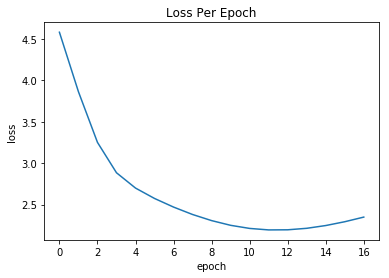

In [37]:
losses = results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


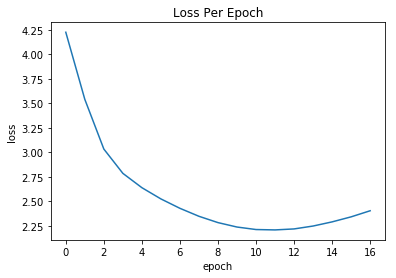

In [38]:
losses = results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [39]:
results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': 0.7560653261587841,
 'recall': 0.8574028476608501,
 'accuracy': 0.7901505814265045,
 'f1_score': 0.8035517206782382}

    config = dict(
        training_set_path           = train_path,
        test_set_path               = test_path,
        execution_mode              = 'Training_mode',
        random_seed                 = 2,
        kg_embedding_model_name     = 'Region',
        embedding_dim               = 100,
        scoring_function            = 1,  # corresponds to L1 
        normalization_of_entities   = 2,  # corresponds to L2
        init_radius                 = 1,
        reg_lambda                  = 2,
        margin_loss                 = 0,
        learning_rate               = 0.1,
        num_epochs                  = 100,  
        batch_size                  = 1024,
        filter_negative_triples     = True,
        preferred_device            = 'gpu'
    )

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


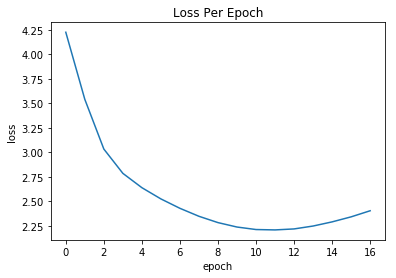

In [40]:
losses = losses[:30]
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [41]:
results.results['eval_summary']

AttributeError: 'dict' object has no attribute 'results'